In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from StatzFunctions import *
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [2]:
stat = 'Strike Rate'
stat2 = 'Economy Rate'
stat_outcome = 'Bad'
stat2_outcome = 'Bad'

In [3]:
# CHANGE THESE
top_right_comment = "The Elite Bowlers,\ndeadly and economical"
bottom_right_comment = "The Leaky Threats,\nthey get wickets but at a cost"
top_left_comment = "The Pressure Builders,\nhard to score off but few wickets"
bottom_left_comment = "The Loose Cannons,\nexpensive and not getting wickets"

In [29]:
df = pd.read_excel(r"C:\Users\George\Documents\Statz.ai\Data\IPL BOWLING w raw data.xlsx", sheet_name="w team badge")

In [5]:
team_badge_dict = dict(zip(df['Team'], df['w team badge']))

In [6]:
sum_df = df[['Player','Wkts','Overs','Runs','Balls']]

In [7]:
sum_df = sum_df.groupby('Player').sum()

In [8]:
sum_df.reset_index(inplace=True)

In [9]:
sum_df.fillna(0, inplace=True)
sum_df.replace('-', 0, inplace=True)
sum_df = sum_df.apply(pd.to_numeric, errors='ignore')
sum_df['Strike Rate'] = sum_df['Balls'] / sum_df['Wkts']
sum_df['Economy Rate'] = sum_df['Runs'] / sum_df['Overs']

In [10]:
sum_df = sum_df[sum_df['Wkts'] > 50]

In [11]:
def get_team(df, pivot_df):
    # Group by Players and Clubs, then sum the goals
    grouped = df.groupby(['Player','Team'])['Wkts'].sum()

    # For each player, find the club with the maximum goals
    max_goals_club = grouped.groupby(level=0).idxmax()

    # Extract the club name from the multi-index
    max_goals_club = max_goals_club.apply(lambda x: x[1])

    # Convert the result to a DataFrame
    max_goals_club_df = max_goals_club.reset_index(name='Team')
    max_goals_club_df.columns = ['Player', 'Team']
    pivot_df['Team'] = pivot_df['Player'].map(max_goals_club_df.set_index('Player')['Team'])
    pivot_df.set_index('Player', inplace=True)

    return pivot_df

In [12]:
team_df = get_team(df, sum_df)

In [13]:
team_df.reset_index(inplace=True)

In [32]:
df = team_df.copy()

In [34]:
df[df['Player'].str.contains('Warne')]

,Player,Wkts,Overs,Runs,Balls,Strike Rate,Economy Rate,Team
59,SK Warne,57,199.0,1447,1194,20.947368,7.271357,RR


In [16]:
df['Team Badge'] = df['Team'].map(team_badge_dict)

In [17]:
df = df[['Team','Player','Economy Rate','Strike Rate','Team Badge']]

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df['Player'] = df['Player'].apply(lambda x: f"{x.split()[0][0]}. {' '.join(x.split()[1:])}")

C:\Users\dmsta\AppData\Local\Temp\ipykernel_9240\3765302295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player'] = df['Player'].apply(lambda x: f"{x.split()[0][0]}. {' '.join(x.split()[1:])}")


In [20]:
df_names = df.copy()

In [21]:
if stat_outcome == 'Good':
    buffer = df[stat].max()
else:
    buffer = -df[stat].max()
if stat2_outcome == 'Good':
    buffer2 = df[stat2].max()
else:
    buffer2 = -df[stat2].max()

In [22]:
import urllib.request
def convert_images(df):
    team_badge_path = []
    for i in range(len(df)):
        #print(i)
        if '/' in df.iloc[i]['Team']:
            team = df.iloc[i]['Team'].split('/ ')[0] + df.iloc[i]['Team'].split('/ ')[1]
            urllib.request.urlretrieve(df.iloc[i]['Team Badge'], rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{team}.png")
            team_badge_path.append(rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{team}.png")
        else:
            urllib.request.urlretrieve(df.iloc[i]['Team Badge'], rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{df.iloc[i]['Team']}.png")
            team_badge_path.append(rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{df.iloc[i]['Team']}.png")
    df['Team Badge'] = team_badge_path
    return df

In [23]:
df_names = convert_images(df_names)

In [24]:
df_names

,Team,Player,Economy Rate,Strike Rate,Team Badge
0,DC,A. Mishra,7.387275,19.373563,C:\Users\George\Documents\Statz.ai\Images\Team...
1,DC,A. Nehra,7.855793,18.000000,C:\Users\George\Documents\Statz.ai\Images\Team...
2,DC,A. Nortje,8.973774,17.566667,C:\Users\George\Documents\Statz.ai\Images\Team...
3,PWI,A. Dinda,8.128537,21.536232,C:\Users\George\Documents\Statz.ai\Images\Team...
4,KKR,A. Russell,9.384783,14.391304,C:\Users\George\Documents\Statz.ai\Images\Team...
...,...,...,...,...,...
67,SRH,T. Natarajan,8.865376,19.955224,C:\Users\George\Documents\Statz.ai\Images\Team...
68,RR,T. Boult,8.314028,19.314050,C:\Users\George\Documents\Statz.ai\Images\Team...
69,KKR,U. Yadav,8.402576,20.237762,C:\Users\George\Documents\Statz.ai\Images\Team...
70,RCB,Y. Chahal,7.852845,17.058537,C:\Users\George\Documents\Statz.ai\Images\Team...


In [25]:
padding1 = ((df_names[stat].max()-df_names[stat].min()) / 50)
padding2 = ((df_names[stat2].max()-df_names[stat2].min()) / 30)

In [26]:
todays_date = pd.to_datetime('today').strftime('%d %B %Y')

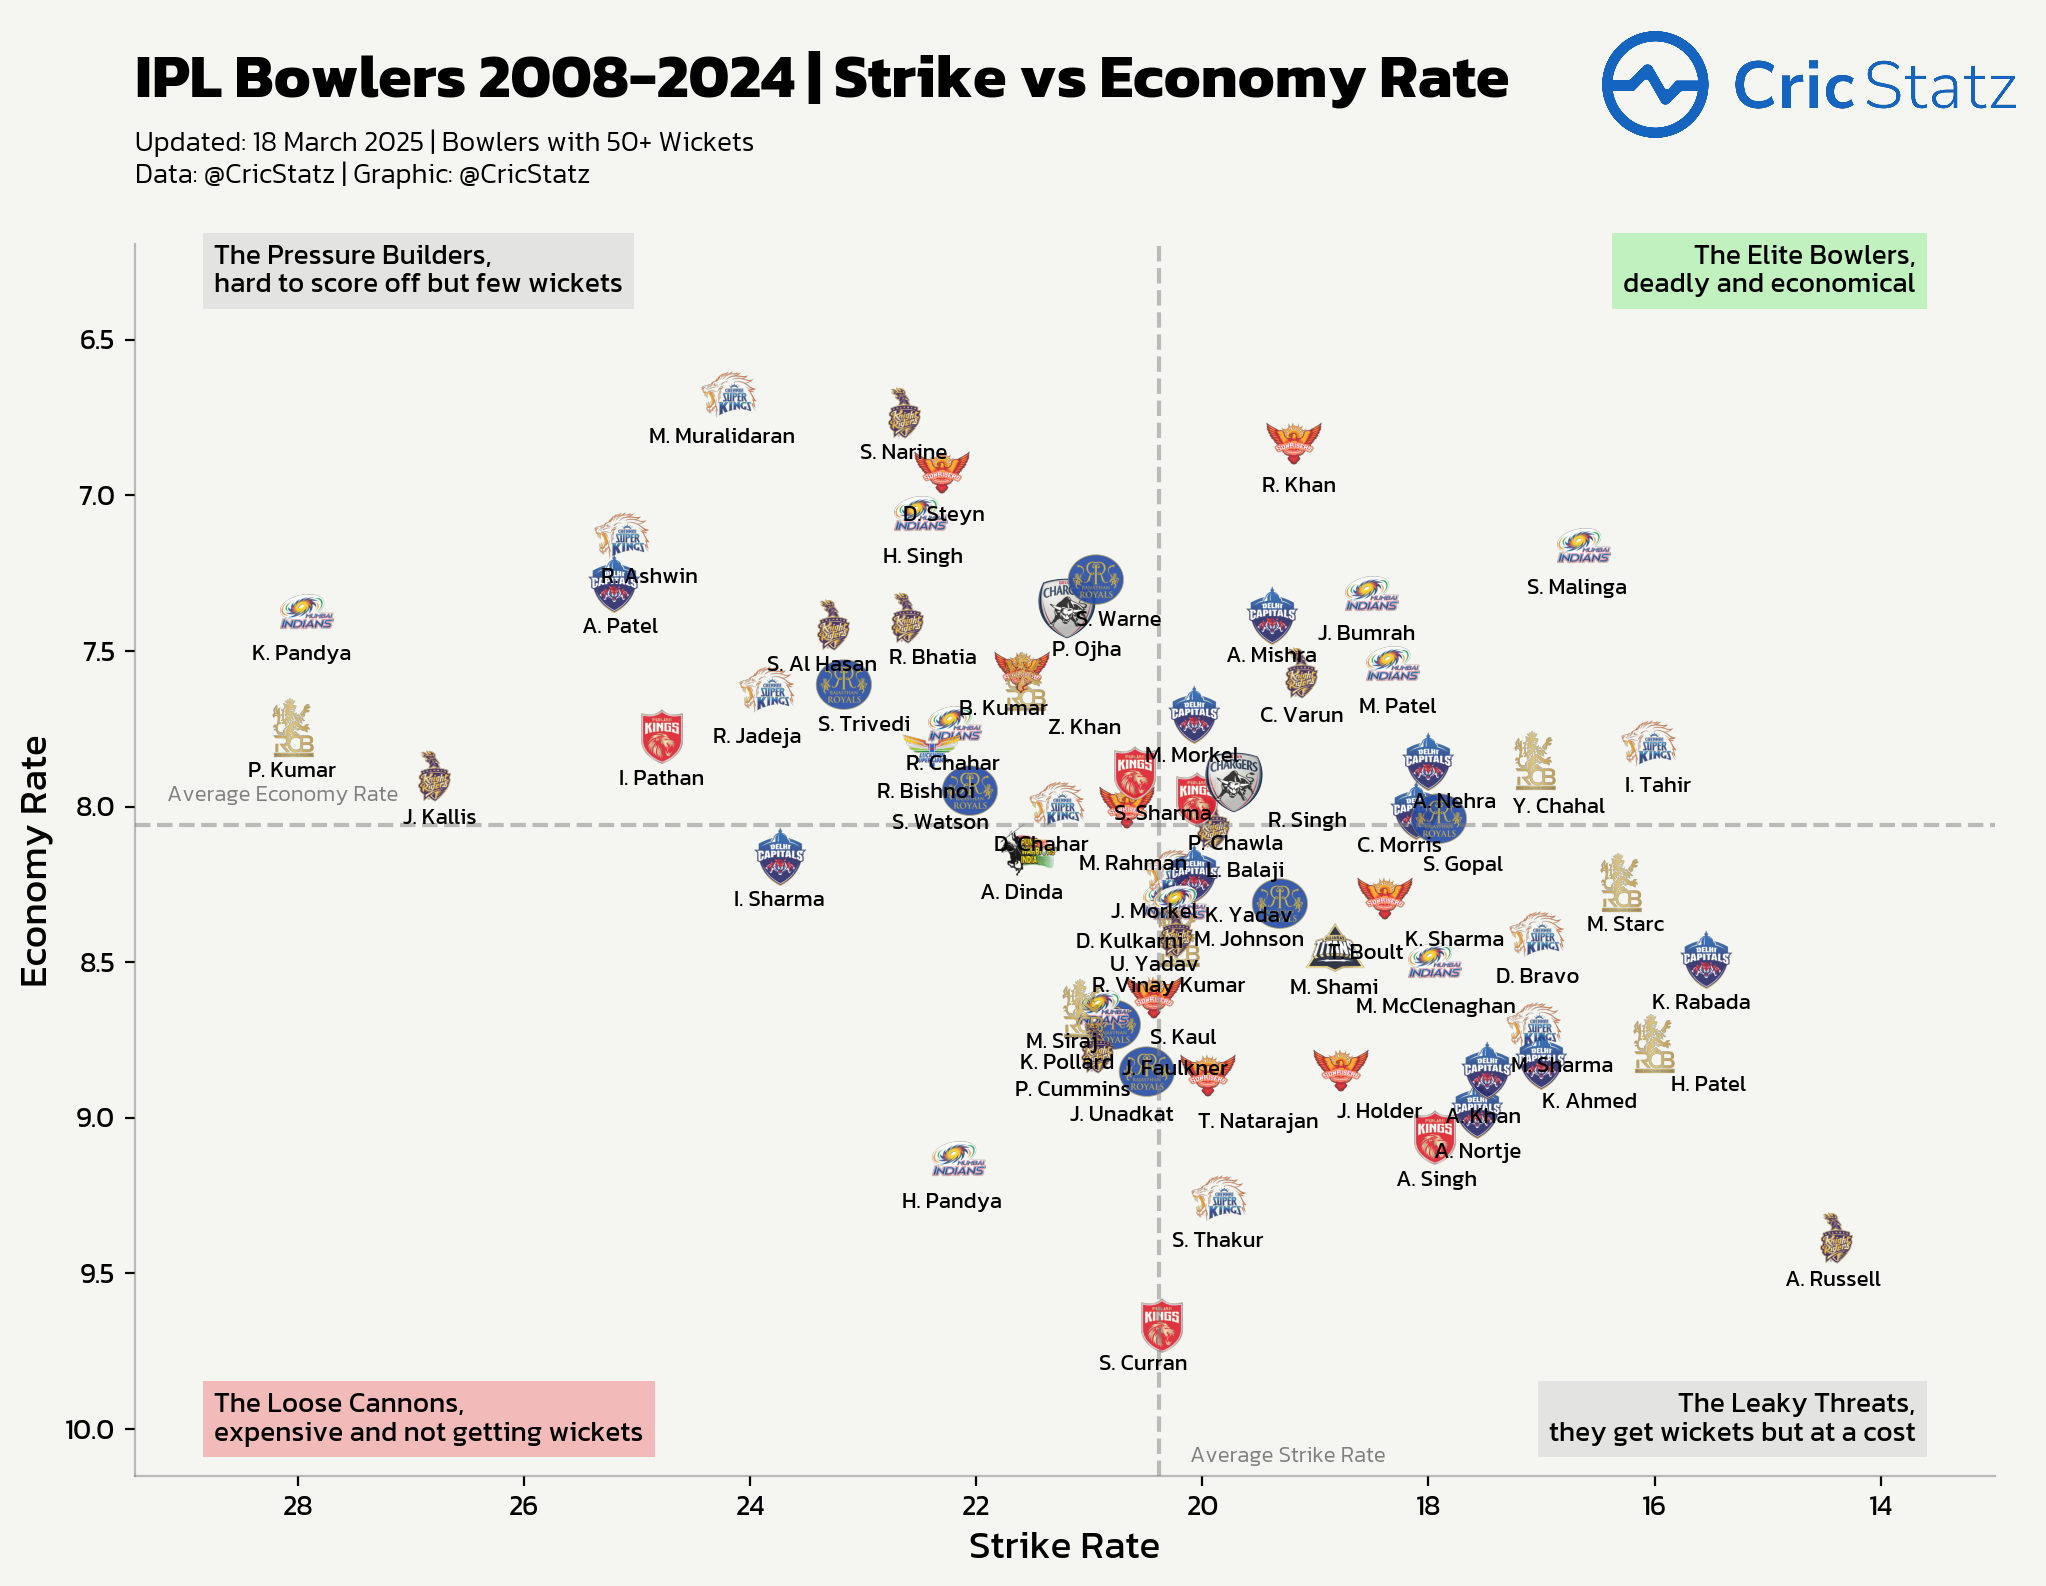

In [28]:
from PIL import Image
from adjustText import adjust_text
import numpy as np

plt.figure(figsize=(12, 8), dpi=200, facecolor='#F5F6F1')  # Set the facecolor to #141514

plt.scatter(df_names[stat], df_names[stat2], color='#F5F6F1', s=0, alpha=1, edgecolor='#F5F6F1', linewidth=0.5)

plt.scatter(df_names[stat], df_names[stat2], color='#F5F6F1', s=0, alpha=1, edgecolor='#F5F6F1', linewidth=0.5)

texts = [plt.text(x, y, text, color='black', fontsize=8, fontproperties = regular, ha = 'center', va = 'bottom') for x, y, text in zip(df_names[stat] - padding1, df_names[stat2] + padding2, df_names['Player'])]

adjust_text(texts, expand = (1.2,1.2))

for i, team in df_names.iterrows():
    badge = plt.imread(team['Team Badge'])
    plt.imshow(np.flipud(np.fliplr(badge)), extent=(team[stat]-padding1, team[stat]+padding1, team[stat2]-padding2, team[stat2]+padding2), aspect='auto', alpha=0.9)
                        
# Add labels and title
plt.ylabel(stat2, fontproperties = regular, size = 14)  # Set the xlabel color to white
plt.xlabel(stat, fontproperties = regular, size = 14)  # Set the ylabel color to white

if stat_outcome == 'Good':
    plt.xlim(df_names[stat].min()-(df_names[stat].max())*0.05, df_names[stat].max()+(df_names[stat].max())*0.07)
else:
    plt.xlim(df_names[stat].max()+(df_names[stat].max())*0.05, df_names[stat].min()-(df_names[stat].max())*0.05)
if stat2_outcome == 'Good':
    plt.ylim(df_names[stat2].min()-(df_names[stat2].max())*0.07, df_names[stat2].max()+(df_names[stat2].max())*0.02)
else:
    plt.ylim(df_names[stat2].max()+(df_names[stat2].max())*0.05, df_names[stat2].min()-(df_names[stat2].max())*0.05)

# Draw a line from the y-axis at the average value
plt.axvline(df_names[stat].mean(), color='grey', linestyle='--', alpha=0.5)
plt.axhline(df_names[stat2].mean(), color='grey', linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

xlim = plt.xlim()
ylim = plt.ylim()

plt.text(xlim[0] + (buffer)*0.01, df_names[stat2].mean() + (buffer2)*0.01, 'Average ' + stat2, color='grey', fontsize=8, ha='left', va='center', fontproperties = light)
plt.text(df_names[stat].mean() + (buffer)*0.01, ylim[0] + (buffer2)*0.01, 'Average ' + stat, color='grey', fontsize=8, ha='left', va='top', fontproperties = light)

# Top Left
plt.text(xlim[0] + buffer*0.025, ylim[1], top_left_comment, 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='left', va='top', fontsize=10, wrap=True, fontproperties = regular)
# Top Right
plt.text(xlim[1] - buffer*0.025, ylim[1], top_right_comment, 
         bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='none'),
         ha='right', va='top', fontsize=10, wrap=True, fontproperties = regular)
# Bottom Left
plt.text(xlim[0] + buffer*0.025, ylim[0] + buffer2*0.01, bottom_left_comment, 
         bbox=dict(facecolor='lightcoral', alpha=0.5, edgecolor='none'),
         ha='left', va='bottom', fontsize=10, wrap=True, fontproperties = regular)
# Bottom Right
plt.text(xlim[1] - buffer*0.025, ylim[0] + buffer2*0.01, bottom_right_comment, 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='right', va='bottom', fontsize=10, wrap=True, fontproperties = regular)

plt.text(0,1.12, f"IPL Bowlers 2008-2024 | Strike vs Economy Rate", ha = 'left',fontsize=22, transform=plt.gca().transAxes, fontproperties=bold)
plt.text(0,1.05, f"Updated: {todays_date} | Bowlers with 50+ Wickets\nData: @CricStatz | Graphic: @CricStatz", ha = 'left',fontsize=10, transform=plt.gca().transAxes, fontproperties=light)
#plt.text(0.8,1.05, f"Through match week {gameweek}", ha = 'right',fontsize=18, transform=plt.gca().transAxes, fontproperties=regular, color='grey', alpha=0.5)

# Set the ticks color to white
plt.xticks(fontproperties = regular)
plt.yticks(fontproperties = regular)

# Set the plot background color to #141514
plt.gca().set_facecolor('#F5F6F1')
# Add text box in each quadrant

statz_logo = plt.imread(r"C:\Users\George\Documents\Statz.ai\Images\Logos and Backgrounds\Statz Long Logo Cricket.png")
imagebox = OffsetImage(statz_logo, zoom=0.12)
ab = AnnotationBbox(imagebox, (0.9, 1.13), frameon=False, xycoords='axes fraction', boxcoords="axes fraction")
plt.gca().add_artist(ab)

plt.savefig(
    f"C:/Users/George/Documents/Statz.ai/Visuals/Cricket/{stat} v {stat2} All Time.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()